In [18]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Dataset Preparation and Spliting

In [9]:
dataset = pd.read_csv("./Machine learning/ML_Dwarka_June19/datasets/fashion-mnist-test.csv")

In [8]:
# print(os.listdir("./Machine learning/ML_Dwarka_June19/datasets/fashion-mnist-test.csv"))

['fashion-mnist-test.csv', 'movie_metadata.csv', 'titanic.csv']


In [10]:
dataset.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset = np.array(dataset)

In [13]:
X = dataset[:4000,1:]
Y =dataset[:4000,0]
print(X.shape,Y.shape)

(4000, 784) (4000,)


In [21]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)
print(x_train.shape , x_test.shape , y_train.shape ,y_test.shape)

(3200, 784) (800, 784) (3200,) (800,)


In [24]:
x_train , x_test = x_train.reshape(-1,28,28,1) ,x_test.reshape(-1,28,28,1)
print(x_train.shape , x_test.shape)

(3200, 28, 28, 1) (800, 28, 28, 1)


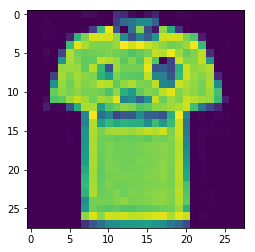

In [22]:
plt.imshow(X[0].reshape(28,28))

## Model Architecture

In [25]:
from keras.layers import Conv2D , MaxPool2D ,ZeroPadding2D , UpSampling2D ,Reshape, Input ,Dense, Activation,Flatten
from keras.utils import np_utils
from keras.models import Model

In [42]:
e = 256

inp = Input(shape = (28,28,1))
conv1 = Conv2D(32 , (3,3) , activation = "relu")(inp)
conv2 = Conv2D(16 , (3,3),activation="relu")(conv1)
mp1 = MaxPool2D((2,2))(conv2)
conv3 = Conv2D(8,(3,3),activation="relu")(mp1)

flat = Flatten()(conv3)
emb = Dense(e , activation="sigmoid")(flat)
fc1 = Dense(800 , activation="sigmoid")(emb)

res1 = Reshape((10 , 10, 8))(fc1)
zrp1 = ZeroPadding2D((1,1))(res1)

conv4 = Conv2D(16 , (3,3),padding="same" , activation ="relu")(zrp1)
ups1 = UpSampling2D((2,2))(conv4)

zrp2 = ZeroPadding2D((1,1))(ups1)
conv5 = Conv2D(32,(3,3),padding="same" , activation ="relu")(zrp2)

zrp3 = ZeroPadding2D((1,1))(conv5)
conv6 = Conv2D(1,(3,3),padding="same" , activation="relu")(zrp3)

In [46]:
c_a_e = Model(inputs=inp, outputs=conv6)
c_a_e.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               205056    
__________

## Encoder and Decoder

In [49]:
for i in enumerate(c_a_e.layers):
    print(i)

(0, <keras.engine.input_layer.InputLayer object at 0x000001841D923390>)
(1, <keras.layers.convolutional.Conv2D object at 0x000001841D923B38>)
(2, <keras.layers.convolutional.Conv2D object at 0x000001841DABFAC8>)
(3, <keras.layers.pooling.MaxPooling2D object at 0x000001841DABF438>)
(4, <keras.layers.convolutional.Conv2D object at 0x000001841DAD5438>)
(5, <keras.layers.core.Flatten object at 0x000001841DAD5DA0>)
(6, <keras.layers.core.Dense object at 0x000001841DB0F550>)
(7, <keras.layers.core.Dense object at 0x000001841DB0FEB8>)
(8, <keras.layers.core.Reshape object at 0x000001841DB3D438>)
(9, <keras.layers.convolutional.ZeroPadding2D object at 0x000001841DB5BE10>)
(10, <keras.layers.convolutional.Conv2D object at 0x000001841DB3D898>)
(11, <keras.layers.convolutional.UpSampling2D object at 0x000001841DB5B748>)
(12, <keras.layers.convolutional.ZeroPadding2D object at 0x000001841DB94550>)
(13, <keras.layers.convolutional.Conv2D object at 0x000001841DB94438>)
(14, <keras.layers.convolution

In [51]:
encoder = Model(inputs=inp,outputs=emb)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               205056    
Total para

In [53]:
decoder_input = Input(shape=(e,))
dec_layer = cae.layers[7](decoder_input)

for i in range(8, len(cae.layers)):
    dec_layer = cae.layers[i](dec_layer)
decoder = Model(inputs=decoder_input, outputs=dec_layer)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 800)               205600    
_________________________________________________________________
reshape_10 (Reshape)         (None, 10, 10, 8)         0         
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 16)        1168      
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 24, 24, 16)        0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 26, 26, 16)        0         
__________

In [56]:
c_a_e.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [63]:
F_mnist = c_a_e.fit(x_train, x_train,
        shuffle=True,
        epochs=30,
        validation_data=(x_test, x_test),
        batch_size=150
       )

Train on 3200 samples, validate on 800 samples
Epoch 1/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2901.8668 - acc: 0.0145 - val_loss: 2835.8993 - val_acc: 0.0251
Epoch 2/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2704.0849 - acc: 0.0592 - val_loss: 2657.7836 - val_acc: 0.0929
Epoch 3/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2554.2734 - acc: 0.1203 - val_loss: 2529.9861 - val_acc: 0.1468
Epoch 4/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2409.2953 - acc: 0.1751 - val_loss: 2432.0484 - val_acc: 0.1842
Epoch 5/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2314.5155 - acc: 0.2127 - val_loss: 2325.4795 - val_acc: 0.2187
Epoch 6/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2207.1561 - acc: 0.2393 - val_loss: 2234.7466 - val_acc: 0.2361
Epoch 7/30
3200/3200 [==============================] - 11s 3ms/step - loss: 2115.3282 - acc: 0.2644 - val_

In [64]:
test = x_train[:20]
preds = c_a_e.predict(test)
print(test.shape, preds.shape)


(20, 28, 28, 1) (20, 28, 28, 1)


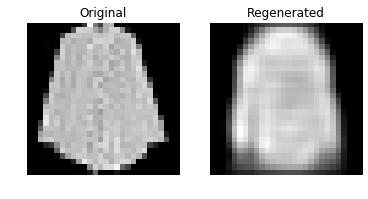

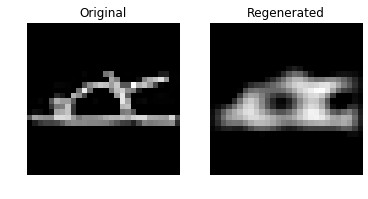

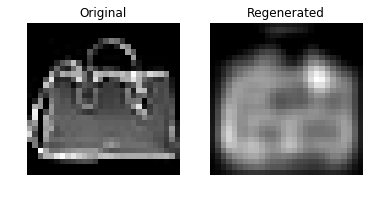

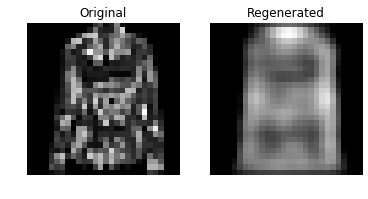

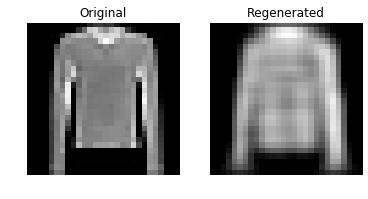

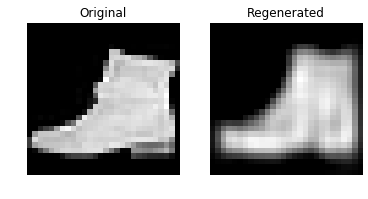

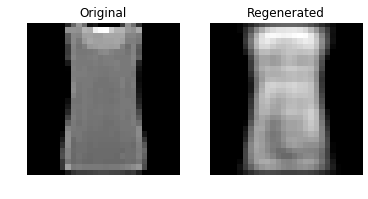

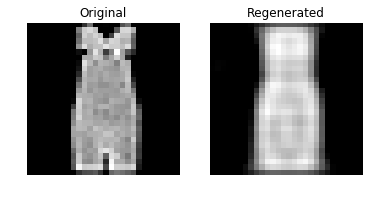

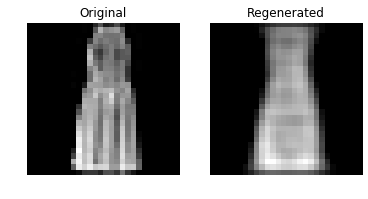

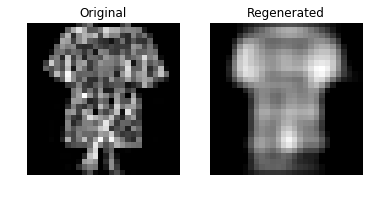

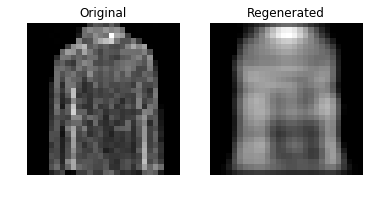

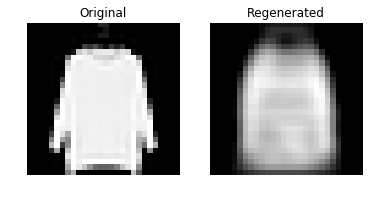

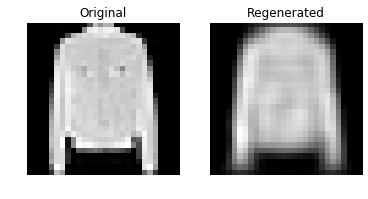

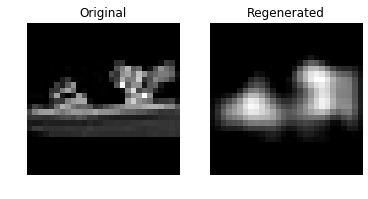

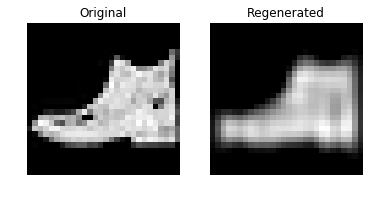

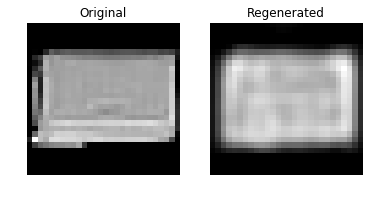

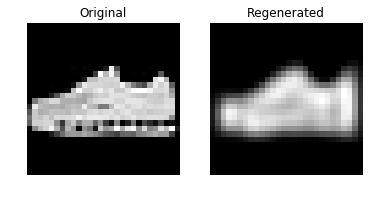

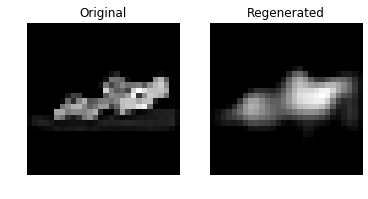

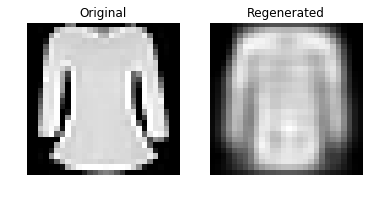

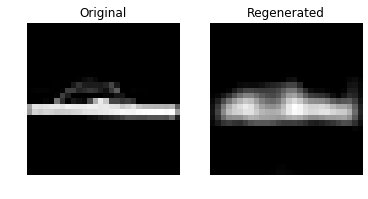

In [65]:
for i in range(test.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(test[i].reshape((28,28)), cmap='gray')
    
    plt.subplot(1,2,2)
    plt.title('Regenerated')
    plt.axis('off')
    plt.imshow(preds[i].reshape((28,28)), cmap='gray')
